In [34]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt



In [35]:
ODA_Multisector = pd.read_csv('Multisector.csv')

In [36]:
ODA_Multisector = ODA_Multisector.drop(['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis=1)

In [37]:
ODA_Multisector

,LOCATION,TIME,Value
0,AUS,2000,108.91
1,AUS,2001,226.22
2,AUS,2002,251.62
3,AUS,2003,280.64
4,AUS,2004,255.19
...,...,...,...
544,LVA,2018,0.78
545,SAU,2015,81.02
546,SAU,2016,202.62
547,SAU,2017,49.32


In [38]:
ODA_Multisector.rename(columns ={'LOCATION': 'Code', 'Value': 'Millions($)', 'TIME': 'Time'}, inplace = True) 

In [39]:
ODA_Multisector

,Code,Time,Millions($)
0,AUS,2000,108.91
1,AUS,2001,226.22
2,AUS,2002,251.62
3,AUS,2003,280.64
4,AUS,2004,255.19
...,...,...,...
544,LVA,2018,0.78
545,SAU,2015,81.02
546,SAU,2016,202.62
547,SAU,2017,49.32


In [40]:
# We need country codes for this. We need unique countries code.. 
ODA_Multisector_2018 = ODA_Multisector[ODA_Multisector['Time']==2018]

len(ODA_Multisector_2018)

38

In [41]:
ODA_Multisector_2018

,Code,Time,Millions($)
18,AUS,2018,516.46
37,AUT,2018,26.37
56,BEL,2018,132.97
75,CAN,2018,276.01
92,CZE,2018,2.67
111,DNK,2018,80.78
130,FIN,2018,35.25
149,FRA,2018,1341.02
168,DEU,2018,2559.79
187,GRC,2018,1.73


In [42]:
ODA_Multisector_2018 = ODA_Multisector_2018[ODA_Multisector_2018.Code != 'DAC']

In [43]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['Code'].tolist()

    #    codes_list.remove('OAVG')
  #  codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(ODA_Multisector_2018)

In [44]:
def create_name_code_dict():
    """Use pycountry library to create a map for converting from country name to country code
    :returns name_code_dict: dictionary"""
    name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}
    dict_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    name_code_dict.update(dict_adjust)
    return name_code_dict

def reverse_dict(dictionary):
    """Reverse other map for converting from country code to country name
    :param dictionary: dictionary
    :returns reversed_dict: dictionary"""
    reversed_dict = dict(zip(dictionary.values(), dictionary.keys()))
    return reversed_dict

def add_country_name(df_data, code_name_dict):
    """Take df_data, add a column with country name and fill it using code_name_dict
    :param df_data: data frame
    :param code_name_dict: dictionary"""
    mapper = lambda x: code_name_dict[x]
    df_data.insert(loc=0, column='Country', value=df_data.loc[:, 'Code'].copy())
    df_data['Country'] = df_data['Country'].apply(mapper)

#add column with country name
name_code_dict = create_name_code_dict()
code_name_dict = reverse_dict(name_code_dict)
#add_country_name(ODA_Social_Infrastructure_wo_DAC, code_name_dict)


# For year 2015
add_country_name(ODA_Multisector_2018, code_name_dict)



C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
len(ODA_Multisector_2018)

37

In [46]:
ODA_Multisector_2018

,Country,Code,Time,Millions($)
18,Australia,AUS,2018,516.46
37,Austria,AUT,2018,26.37
56,Belgium,BEL,2018,132.97
75,Canada,CAN,2018,276.01
92,Czech Republic,CZE,2018,2.67
111,Denmark,DNK,2018,80.78
130,Finland,FIN,2018,35.25
149,France,FRA,2018,1341.02
168,Germany,DEU,2018,2559.79
187,Greece,GRC,2018,1.73


In [47]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata(countries_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp'}, 2018, 2018)


In [48]:
gdp_ppp

,gdp_ppp
country,
United Arab Emirates,66616.050283
Australia,45377.755143
Austria,46260.382383
Belgium,43582.128396
Bulgaria,19320.751234
Canada,44078.065596
Switzerland,59317.323990
Czech Republic,33435.509181
Germany,45936.182713


In [49]:

#reset index "country'
gdp_ppp.reset_index(level=['country'], inplace=True)


In [50]:
def add_country_code(df_data, name_code_dict):
    """Take df_data, add a column with country code and fill it using name_code_dict
    :param df_data: data frame
    :param name_code_dict: dictionary"""
    mapper = lambda x: name_code_dict[x]
    df_data.insert(loc=1, column='Code', value=df_data.loc[:, 'country'].copy())
    df_data['Code'] = df_data['Code'].apply(mapper)

#add column with country code
add_country_code(gdp_ppp, name_code_dict)

gdp_ppp

,country,Code,gdp_ppp
0,United Arab Emirates,ARE,66616.050283
1,Australia,AUS,45377.755143
2,Austria,AUT,46260.382383
3,Belgium,BEL,43582.128396
4,Bulgaria,BGR,19320.751234
5,Canada,CAN,44078.065596
6,Switzerland,CHE,59317.323990
7,Czech Republic,CZE,33435.509181
8,Germany,DEU,45936.182713
9,Denmark,DNK,48419.437883


<font size=4> <center> <br><br><br> <u> Regression Analysis   <br><br><br>

In [51]:
def merge_df_onCode(df_data1, df_data2):
    """Merge two data frames on Code column, drop double country column
    :param df_data1: data frame
    :param df_data2: data frame
    :returns df_joined: data frame"""
    df_joined = pd.merge(df_data1, df_data2, on='Code')
 #   df_joined.drop(['Country_y'], axis=1, inplace=True)
    return df_joined

#merge data 
combined_ODA_Multisector_2018 = merge_df_onCode(ODA_Multisector_2018, gdp_ppp)

combined_ODA_Multisector_2018

,Country,Code,Time,Millions($),country,gdp_ppp
0,Australia,AUS,2018,516.46,Australia,45377.755143
1,Austria,AUT,2018,26.37,Austria,46260.382383
2,Belgium,BEL,2018,132.97,Belgium,43582.128396
3,Canada,CAN,2018,276.01,Canada,44078.065596
4,Czech Republic,CZE,2018,2.67,Czech Republic,33435.509181
5,Denmark,DNK,2018,80.78,Denmark,48419.437883
6,Finland,FIN,2018,35.25,Finland,42060.804122
7,France,FRA,2018,1341.02,France,39555.544663
8,Germany,DEU,2018,2559.79,Germany,45936.182713
9,Greece,GRC,2018,1.73,Greece,25140.703137


In [52]:
combined_ODA_Multisector_2018 = combined_ODA_Multisector_2018.drop(['country'], axis=1)

In [53]:
combined_ODA_Multisector_2018

,Country,Code,Time,Millions($),gdp_ppp
0,Australia,AUS,2018,516.46,45377.755143
1,Austria,AUT,2018,26.37,46260.382383
2,Belgium,BEL,2018,132.97,43582.128396
3,Canada,CAN,2018,276.01,44078.065596
4,Czech Republic,CZE,2018,2.67,33435.509181
5,Denmark,DNK,2018,80.78,48419.437883
6,Finland,FIN,2018,35.25,42060.804122
7,France,FRA,2018,1341.02,39555.544663
8,Germany,DEU,2018,2559.79,45936.182713
9,Greece,GRC,2018,1.73,25140.703137


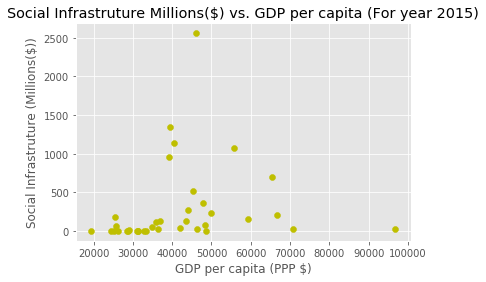

In [54]:
def show_scatterplot(df_data, variables, color, title, xlabel, ylabel):
    """Take df_data and plot for chosen columns in variables list
    :param df_data: data frame
    :param variables: list of strings
    :param color: string"""
    plt.scatter(x=df_data[variables[0]], y=df_data[variables[1]], color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
matplotlib.style.use('ggplot')
plot_combined_ODA_Multisector_2018 = show_scatterplot(combined_ODA_Multisector_2018, ['gdp_ppp', 'Millions($)'], 'y',
                                    'Social Infrastruture Millions($) vs. GDP per capita (For year 2015)', 'GDP per capita (PPP $)',
                                    'Social Infrastruture (Millions($))')

In [89]:
combined_ODA_Production_2018_cleaned

#Infra = Infra.drop(Infra[Infra.LOCATION == 'MDA'].index)

combined_ODA_Production_2018_cleaned_wo_USA = combined_ODA_Production_2018_cleaned[combined_ODA_Production_2018_cleaned.Code != 'USA'] 
#  &  combined_ODA_Social_Infrastructure_2015_cleaned.Code != 'LUX'  ]

combined_ODA_Production_2018_cleaned_wo_JPN = combined_ODA_Production_2018_cleaned_wo_USA[combined_ODA_Production_2018_cleaned_wo_USA.Code != 'JPN'] 
    
combined_ODA_Production_2018_cleaned_wo_GBR = combined_ODA_Production_2018_cleaned_wo_JPN[combined_ODA_Production_2018_cleaned_wo_JPN.Code != 'GBR'] 
    
combined_ODA_Production_2018_cleaned_wo_DEU = combined_ODA_Production_2018_cleaned_wo_GBR[combined_ODA_Production_2018_cleaned_wo_GBR.Code != 'DEU'] 
    
combined_ODA_Production_2018_cleaned_wo_FRA = combined_ODA_Production_2018_cleaned_wo_DEU[combined_ODA_Production_2018_cleaned_wo_DEU.Code != 'FRA'] 

combined_ODA_Production_2018_cleaned_wo_LUX = combined_ODA_Production_2018_cleaned_wo_FRA[combined_ODA_Production_2018_cleaned_wo_FRA.Code != 'LUX'] 

combine_ODA_Production_2018 = combined_ODA_Production_2018_cleaned_wo_LUX

In [90]:
combine_ODA_Production_2018

,Country,Code,Time,Millions($),gdp_ppp
0,Australia,AUS,2018,222.30,45377.755143
1,Austria,AUT,2018,34.67,46260.382383
2,Belgium,BEL,2018,74.27,43582.128396
3,Canada,CAN,2018,247.69,44078.065596
4,Czech Republic,CZE,2018,5.09,33435.509181
5,Denmark,DNK,2018,81.19,48419.437883
6,Finland,FIN,2018,47.74,42060.804122
9,Iceland,ISL,2018,3.80,48605.577066
10,Ireland,IRL,2018,31.56,70855.327240
11,Italy,ITA,2018,132.76,35828.486281


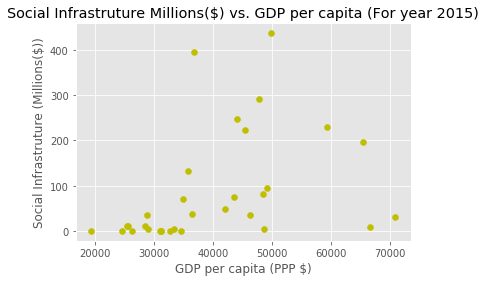

In [91]:
#plot_combine_ODA_Production_2018


matplotlib.style.use('ggplot')
plot_combine_ODA_Production_2018 = show_scatterplot(combine_ODA_Production_2018, ['gdp_ppp', 'Millions($)'], 'y',
                                    'Social Infrastruture Millions($) vs. GDP per capita (For year 2015)', 'GDP per capita (PPP $)',
                                    'Social Infrastruture (Millions($))')
plot_combine_ODA_Production_2018

<font size = 3> <br> <br> <center> <i> Pretty much linear except a few outliers. Taking log to reduce the skewness <br>

In [92]:
combine_ODA_Production_2018

,Country,Code,Time,Millions($),gdp_ppp
0,Australia,AUS,2018,222.30,45377.755143
1,Austria,AUT,2018,34.67,46260.382383
2,Belgium,BEL,2018,74.27,43582.128396
3,Canada,CAN,2018,247.69,44078.065596
4,Czech Republic,CZE,2018,5.09,33435.509181
5,Denmark,DNK,2018,81.19,48419.437883
6,Finland,FIN,2018,47.74,42060.804122
9,Iceland,ISL,2018,3.80,48605.577066
10,Ireland,IRL,2018,31.56,70855.327240
11,Italy,ITA,2018,132.76,35828.486281


In [93]:
ODA_combine_ODA_Production_2018_gdp_ppp_log = combine_ODA_Production_2018

In [94]:
ODA_combine_ODA_Production_2018_gdp_ppp_log['log_value'] = np.log(ODA_combine_ODA_Production_2018_gdp_ppp_log['gdp_ppp'])

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
ODA_combine_ODA_Production_2018_gdp_ppp_log

,Country,Code,Time,Millions($),gdp_ppp,log_value
0,Australia,AUS,2018,222.30,45377.755143,10.722777
1,Austria,AUT,2018,34.67,46260.382383,10.742041
2,Belgium,BEL,2018,74.27,43582.128396,10.682402
3,Canada,CAN,2018,247.69,44078.065596,10.693718
4,Czech Republic,CZE,2018,5.09,33435.509181,10.417374
5,Denmark,DNK,2018,81.19,48419.437883,10.787657
6,Finland,FIN,2018,47.74,42060.804122,10.646872
9,Iceland,ISL,2018,3.80,48605.577066,10.791494
10,Ireland,IRL,2018,31.56,70855.327240,11.168395
11,Italy,ITA,2018,132.76,35828.486281,10.486499


In [96]:
ODA_combine_ODA_Production_2018_gdp_ppp_log = ODA_combine_ODA_Production_2018_gdp_ppp_log.rename(columns={"log_value": "gdp_ppp_log"})

In [97]:
ODA_combine_ODA_Production_2018_gdp_ppp_log

,Country,Code,Time,Millions($),gdp_ppp,gdp_ppp_log
0,Australia,AUS,2018,222.30,45377.755143,10.722777
1,Austria,AUT,2018,34.67,46260.382383,10.742041
2,Belgium,BEL,2018,74.27,43582.128396,10.682402
3,Canada,CAN,2018,247.69,44078.065596,10.693718
4,Czech Republic,CZE,2018,5.09,33435.509181,10.417374
5,Denmark,DNK,2018,81.19,48419.437883,10.787657
6,Finland,FIN,2018,47.74,42060.804122,10.646872
9,Iceland,ISL,2018,3.80,48605.577066,10.791494
10,Ireland,IRL,2018,31.56,70855.327240,11.168395
11,Italy,ITA,2018,132.76,35828.486281,10.486499


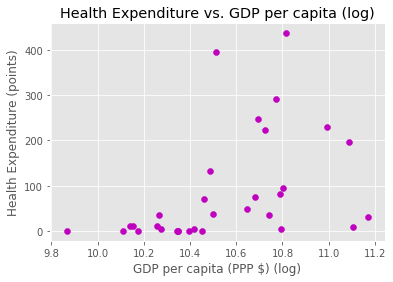

In [98]:

#take log from GDP values
#health_gdp_ppp_log = take_log(combined_health_gdp_ppp, ['gdp_ppp'])

#plot with GDP log
ODA_combine_ODA_Production_2018_gdp_ppp_log_plot = show_scatterplot(ODA_combine_ODA_Production_2018_gdp_ppp_log, ['gdp_ppp_log', 'Millions($)'], 'm', 
                                         'Health Expenditure vs. GDP per capita (log)', 'GDP per capita (PPP $) (log)',
                                    'Health Expenditure (points)')

In [99]:
ODA_Production_gdp_ppp_log = ODA_combine_ODA_Production_2018_gdp_ppp_log

In [100]:
ODA_Production_gdp_ppp_log = ODA_Production_gdp_ppp_log.rename(columns={"Millions($)": "Millions"})

In [101]:
ODA_Production_gdp_ppp_log

,Country,Code,Time,Millions,gdp_ppp,gdp_ppp_log
0,Australia,AUS,2018,222.30,45377.755143,10.722777
1,Austria,AUT,2018,34.67,46260.382383,10.742041
2,Belgium,BEL,2018,74.27,43582.128396,10.682402
3,Canada,CAN,2018,247.69,44078.065596,10.693718
4,Czech Republic,CZE,2018,5.09,33435.509181,10.417374
5,Denmark,DNK,2018,81.19,48419.437883,10.787657
6,Finland,FIN,2018,47.74,42060.804122,10.646872
9,Iceland,ISL,2018,3.80,48605.577066,10.791494
10,Ireland,IRL,2018,31.56,70855.327240,11.168395
11,Italy,ITA,2018,132.76,35828.486281,10.486499


In [103]:
#perform OLS 
model_ODA_Production_gdp_ppp_log = smf.ols(formula='Millions ~ gdp_ppp_log', data=ODA_Production_gdp_ppp_log).fit()
model_ODA_Production_gdp_ppp_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Millions   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.025
Date:                Sun, 12 Apr 2020   Prob (F-statistic):             0.0127
Time:                        17:38:58   Log-Likelihood:                -195.04
No. Observations:                  32   AIC:                             394.1
Df Residuals:                      30   BIC:                             397.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1661.1825    659.109     -2.520      0.017   -3007.263    -315.102
gdp_ppp_log   165.6490     62.500      2.650      0.013      38.007     293.291
==============================================================================
Omnibus:                       15.364   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.753
Skew:                           1.422   Prob(JB):                     0.000230
Kurtosis:                       5.117   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#perform OLS 
model_ODA_Production_gdp_ppp_log = smf.ols(formula='gdp_ppp_log  ~ Millions', data=ODA_Production_gdp_ppp_log).fit()
model_ODA_Production_gdp_ppp_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_ppp_log   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.025
Date:                Sun, 12 Apr 2020   Prob (F-statistic):             0.0127
Time:                        17:39:58   Log-Likelihood:                -4.9268
No. Observations:                  32   AIC:                             13.85
Df Residuals:                      30   BIC:                             16.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4438      0.063    165.073      0.000      10.315      10.573
Millions       0.0011      0.000      2.650      0.013       0.000       0.002
==============================================================================
Omnibus:                        2.593   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.698
Skew:                           0.558   Prob(JB):                        0.428
Kurtosis:                       3.164   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""